In [ ]:
from utilsation import *  
import pandas as pd

columns = ['Date','Open','High','Low','Close','Volume','Yield','PercentageVolume',
           'SMA6','EMA6','WMA6','HMA6','SMA20','EMA20','WMA20','HMA20','SMA50','EMA50','WMA50','HMA50',
           'SMA100','EMA100','WMA100','HMA100','MACD','CCI','Stochastic Oscillator','RSI','ROC','PPO',
          'KST','BOLU','BOLD','BOLM']
data = pd.read_csv('Data after preprocessing/EURUSD/EURUSD_D1.csv', names = columns, header=0)
data.head(5)

,Date,Open,High,Low,Close,Volume,Yield,PercentageVolume,SMA6,EMA6,...,MACD,CCI,Stochastic Oscillator,RSI,ROC,PPO,KST,BOLU,BOLD,BOLM
108,2007-05-07 00:00,1.35920,1.36255,1.35897,1.35957,670412,0.000272,0.000053,1.358705,1.359373,...,0.004475,78.351057,41.531165,52.202416,-0.277258,0.330289,17.205950,1.368192,1.351420,1.359806
109,2007-05-08 00:00,1.35962,1.36202,1.35155,1.35377,673355,-0.004303,0.000155,1.357632,1.357772,...,0.003709,-26.340773,13.333333,39.059614,-0.742723,0.273818,16.310808,1.368203,1.351431,1.359817
110,2007-05-09 00:00,1.35379,1.35641,1.35187,1.35326,659615,-0.000391,0.000069,1.356630,1.356483,...,0.003027,-64.706835,10.270270,38.086730,-0.437022,0.223454,15.282046,1.368197,1.351425,1.359811
111,2007-05-10 00:00,1.35325,1.35624,1.34656,1.34757,674149,-0.004197,0.000144,1.355378,1.353936,...,0.002004,-111.522459,4.667283,28.839512,-1.291386,0.147980,14.108170,1.367885,1.351113,1.359499
112,2007-05-11 00:00,1.34760,1.35305,1.34628,1.35222,615659,0.003428,0.000110,1.354260,1.353446,...,0.001550,-81.715962,27.098540,42.096151,-0.743568,0.114500,12.880034,1.367427,1.350655,1.359041


In [ ]:
toAdd = ['Volume', 'Date','High','Low','Open','Close']
close = data['Close']
df = selectData(data,toAdd)
normDf = normalizeData(df)
normClose = normalizeData(close)

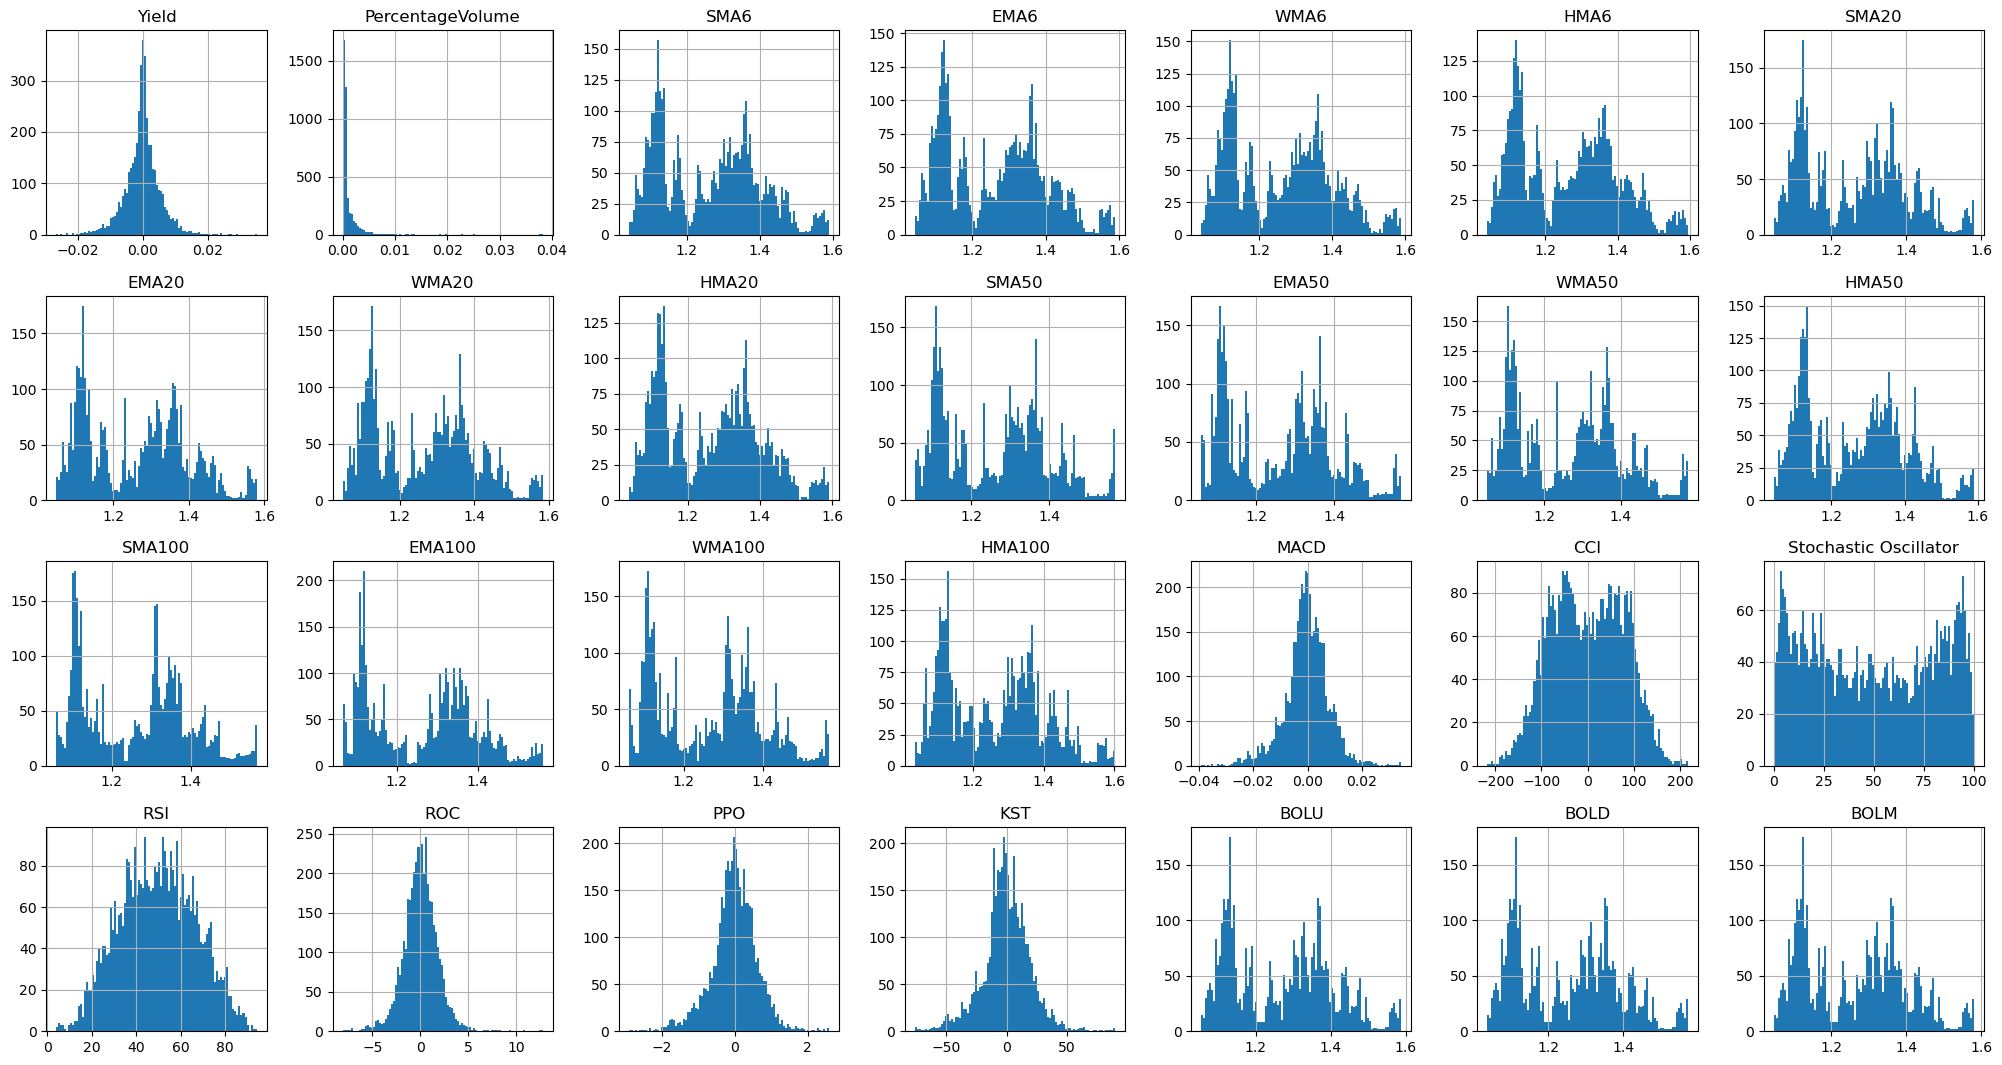

In [154]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(figsize=(28,15), layout=(3,6), bins=100)
plt.show()

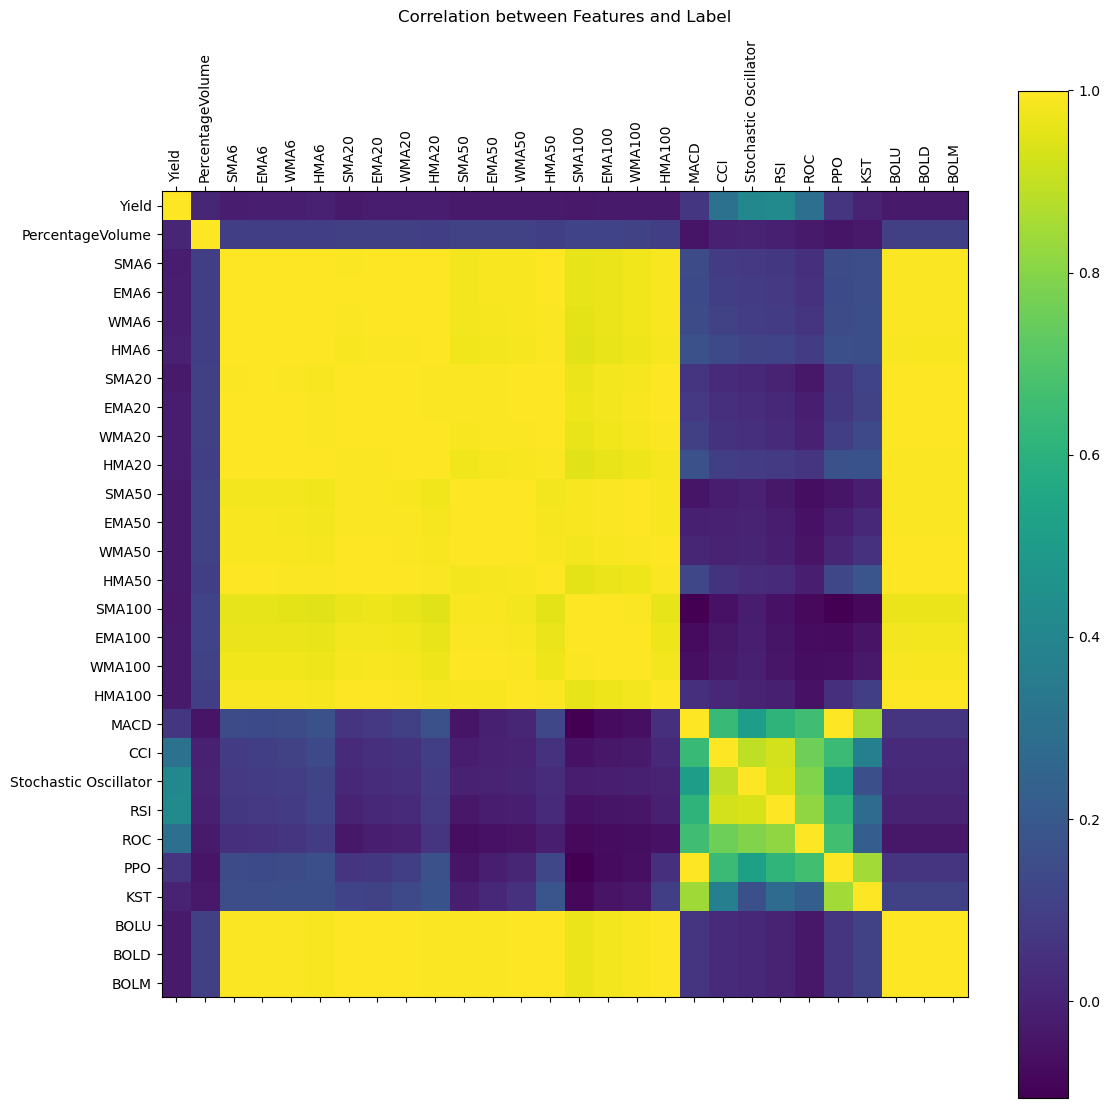

In [156]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(13,13))
plt.matshow(normDf.corr(), fignum=1)
plt.colorbar()
plt.yticks(range(len(normDf.columns)),normDf.columns,fontsize=10)
plt.xticks(range(len(normDf.columns)),normDf.columns,fontsize=10,rotation=90)
plt.title("Correlation between Features and Label", y=1.2)
plt.show()

In [157]:
corr = normDf.corr()
corr.style.background_gradient(cmap='coolwarm')

,Yield,PercentageVolume,SMA6,EMA6,WMA6,HMA6,SMA20,EMA20,WMA20,HMA20,SMA50,EMA50,WMA50,HMA50,SMA100,EMA100,WMA100,HMA100,MACD,CCI,Stochastic Oscillator,RSI,ROC,PPO,KST,BOLU,BOLD,BOLM
Yield,1.000000,0.013045,-0.019729,-0.013731,-0.013866,-0.004450,-0.025681,-0.023436,-0.023262,-0.022641,-0.027041,-0.026663,-0.026357,-0.026569,-0.029370,-0.028715,-0.027535,-0.027117,0.066690,0.305610,0.408342,0.424048,0.295927,0.065283,-0.000494,-0.026598,-0.026598,-0.026598
PercentageVolume,0.013045,1.000000,0.099601,0.099920,0.099357,0.098828,0.103644,0.103360,0.101959,0.098282,0.108618,0.109304,0.106060,0.100228,0.117876,0.118045,0.112179,0.100079,-0.043427,-0.004093,-0.002852,-0.010433,-0.026365,-0.043849,-0.029633,0.103815,0.103815,0.103815
SMA6,-0.019729,0.099601,1.000000,0.999861,0.999796,0.998023,0.995467,0.997144,0.998354,0.999503,0.981648,0.987226,0.990719,0.996570,0.957416,0.968672,0.976755,0.989884,0.145643,0.091959,0.079125,0.070890,0.048019,0.144142,0.156224,0.995137,0.995137,0.995137
EMA6,-0.013731,0.099920,0.999861,1.000000,0.999895,0.998652,0.995727,0.997344,0.998464,0.999160,0.982140,0.987622,0.991095,0.996572,0.957960,0.969165,0.977248,0.990215,0.143267,0.096951,0.083783,0.076016,0.049201,0.141749,0.154032,0.995395,0.995395,0.995395
WMA6,-0.013866,0.099357,0.999796,0.999895,1.000000,0.999074,0.994455,0.996364,0.997617,0.999277,0.980408,0.986093,0.989606,0.995599,0.956044,0.967364,0.975498,0.988683,0.152565,0.106371,0.093241,0.085863,0.061222,0.151017,0.157035,0.994086,0.994086,0.994086
HMA6,-0.004450,0.098828,0.998023,0.998652,0.999074,1.000000,0.991149,0.993510,0.994838,0.997440,0.976684,0.982565,0.986112,0.992348,0.952090,0.963518,0.971744,0.985012,0.165919,0.136001,0.121649,0.116139,0.087563,0.164275,0.158316,0.990702,0.990702,0.990702
SMA20,-0.025681,0.103644,0.995467,0.995727,0.994455,0.991149,1.000000,0.999573,0.999162,0.992704,0.991392,0.994873,0.997832,0.997459,0.969157,0.979146,0.986726,0.996779,0.066088,0.030152,0.017818,0.004836,-0.033609,0.064865,0.115065,0.999990,0.999990,0.999990
EMA20,-0.023436,0.103360,0.997144,0.997344,0.996364,0.993510,0.999573,1.000000,0.999553,0.994887,0.991887,0.995360,0.997904,0.996860,0.970429,0.980116,0.987538,0.995865,0.075164,0.042255,0.034052,0.020408,-0.012531,0.073938,0.109053,0.999509,0.999509,0.999509
WMA20,-0.023262,0.101959,0.998354,0.998464,0.997617,0.994838,0.999162,0.999553,1.000000,0.996700,0.987835,0.992357,0.995614,0.998517,0.964581,0.975218,0.983045,0.994823,0.102020,0.054232,0.040662,0.030575,-0.003053,0.100666,0.137757,0.999008,0.999008,0.999008
HMA20,-0.022641,0.098282,0.999503,0.999160,0.999277,0.997440,0.992704,0.994887,0.996700,1.000000,0.977096,0.983363,0.987045,0.995203,0.952273,0.963933,0.972142,0.986443,0.167871,0.100415,0.087342,0.080355,0.063944,0.166309,0.171884,0.992292,0.992292,0.992292


In [ ]:

from pandas.plotting import scatter_matrix
axes = scatter_matrix(normDf, figsize=(30,20))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if i < j:
            axes[i,j].set_visible(False)
plt.show()


"\nfrom pandas.plotting import scatter_matrix\naxes = scatter_matrix(normDf, figsize=(30,20))\nfor ax in axes.flatten():\n    ax.xaxis.label.set_rotation(90)\n    ax.yaxis.label.set_rotation(0)\n    ax.yaxis.label.set_ha('right')\nfor i in range(np.shape(axes)[0]):\n    for j in range(np.shape(axes)[1]):\n        if i < j:\n            axes[i,j].set_visible(False)\nplt.show()\n"

In [159]:
df.describe()

,Yield,PercentageVolume,SMA6,EMA6,WMA6,HMA6,SMA20,EMA20,WMA20,HMA20,...,MACD,CCI,Stochastic Oscillator,RSI,ROC,PPO,KST,BOLU,BOLD,BOLM
count,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,...,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000
mean,0.000013,0.000996,1.262886,1.262887,1.262851,1.262782,1.263192,1.263185,1.263054,1.262805,...,-0.000289,-0.494021,49.125993,49.883487,-0.021394,-0.026235,-0.365808,1.271608,1.254836,1.263222
std,0.005466,0.001723,0.134420,0.134330,0.134445,0.134667,0.133997,0.133673,0.134104,0.134850,...,0.008105,77.633071,30.906740,16.968410,1.811851,0.621883,19.758199,0.133963,0.133963,0.133963
min,-0.026624,0.000000,1.042187,1.043997,1.041784,1.039315,1.046509,1.049516,1.046267,1.037456,...,-0.039021,-216.818029,0.000000,4.098191,-8.121461,-2.914867,-75.801828,1.055009,1.038237,1.046623
25%,-0.002596,0.000278,1.129803,1.129269,1.129825,1.130558,1.127822,1.127380,1.128006,1.131160,...,-0.004266,-61.630472,20.493125,37.156596,-1.056724,-0.345972,-10.332116,1.136112,1.119339,1.127725
50%,0.000095,0.000462,1.274220,1.274902,1.274270,1.272535,1.278639,1.280047,1.276677,1.271312,...,-0.000112,-1.199876,48.271799,49.999177,-0.013602,-0.009110,-0.526748,1.287455,1.270683,1.279069
75%,0.002612,0.000980,1.362567,1.362745,1.362770,1.362815,1.362456,1.363093,1.362588,1.362679,...,0.004441,62.628979,78.601271,62.485381,1.037170,0.347986,11.437061,1.370724,1.353952,1.362338
max,0.034954,0.038251,1.589047,1.588542,1.589497,1.594462,1.580494,1.580024,1.583246,1.591144,...,0.034426,216.449052,100.000000,94.160581,12.780866,2.580451,89.998344,1.588927,1.572155,1.580541


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(4,7,figsize=(25,13))
fig.tight_layout()
axes = axes.flatten()
for i, col in enumerate(list(sorted(df.columns))):
    axes[i].boxplot(df[col], showfliers = False)
    axes[i].set_title(col)
    axes[i].grid()
plt.show()

'import matplotlib.pyplot as plt\n%matplotlib inline\nfig, axes = plt.subplots(4,7,figsize=(25,13))\nfig.tight_layout()\naxes = axes.flatten()\nfor i, col in enumerate(list(sorted(df.columns))):\n    axes[i].boxplot(df[col], showfliers = False)\n    axes[i].set_title(col)\n    axes[i].grid()\nplt.show()'

In [161]:
from sklearn.feature_selection import mutual_info_regression

feature_scores = mutual_info_regression(df, close, random_state=0)
for score, f_name in sorted(zip(feature_scores, df.columns), reverse=True):
        print(f_name, score)

HMA6 3.3214133772887497
WMA6 2.8967585033615104
EMA6 2.8144452671226907
SMA6 2.6276077913391926
HMA20 2.478438626578584
WMA20 2.2765053892611538
EMA20 2.221622098422853
HMA50 2.114946471249824
SMA20 2.0821901942635708
BOLM 2.070349966549997
BOLD 2.070342800620133
BOLU 2.070303251858511
WMA50 2.00239007914175
HMA100 1.96610176742966
EMA50 1.9002447055696794
SMA50 1.8484709893760911
WMA100 1.804679504219334
EMA100 1.7597461936923837
SMA100 1.7348533465159006
MACD 0.43153847117994815
PPO 0.4174536936926456
KST 0.3958697685649879
PercentageVolume 0.18406935729055363
RSI 0.17387056951815172
ROC 0.15290292966649766
CCI 0.13341131465067857
Stochastic Oscillator 0.09599769353797516
Yield 0.013153987736083117


Machine Learning Models

 Support Vector Regressor

In [ ]:
from utilsation import *  
import pandas as pd

columns = ['Date','Open','High','Low','Close','Volume','Yield','PercentageVolume',
           'SMA6','EMA6','WMA6','HMA6','SMA20','EMA20','WMA20','HMA20','SMA50','EMA50','WMA50','HMA50',
           'SMA100','EMA100','WMA100','HMA100','MACD','CCI','Stochastic Oscillator','RSI','ROC','PPO',
           'KST','BOLU','BOLD','BOLM']
data = pd.read_csv('Data after preprocessing/EURUSD/EURUSD_D1.csv', names = columns, header = 0)
toAdd = ['Volume', 'Date','High','Low','Open','Close']
df = selectData(data,toAdd)

In [163]:
closingPrices = data['Close']
closingPrices = closingPrices.reset_index(drop=True)
normDf = normalizeData(df)
images = generateImages(normDf)
images = np.array(images)

Training and Test Datasets

In [164]:
from sklearn.model_selection import train_test_split
train_X, _, train_Y, _ = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = True, random_state = 42)
_, test_X, _, test_Y = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = False)

In [165]:
train_X = train_X.reshape(train_X.shape[0],28*28).astype(np.float32)
test_X = test_X.reshape(test_X.shape[0],28*28).astype(np.float32)

In [ ]:
from sklearn.svm import SVR
from DTW import *
import json

with open("Machine Learning/MLModels.json","r") as f:
    params = json.load(f)["Support Vector Regression"]["EURUSD"]
svr = SVR(**params)
predictedPrices = svr.fit(train_X, train_Y).predict(test_X)
print("MSE: {:e}".format(np.mean((predictedPrices-test_Y)**2)))
print("CORR: {:.3f}".format(np.corrcoef(predictedPrices, test_Y)[0,1]))
print("DTW: {:.3f}".format(DTW(predictedPrices, np.array(test_Y),1)))

MSE: 1.359575e-03
CORR: 0.972
DTW: 27.496


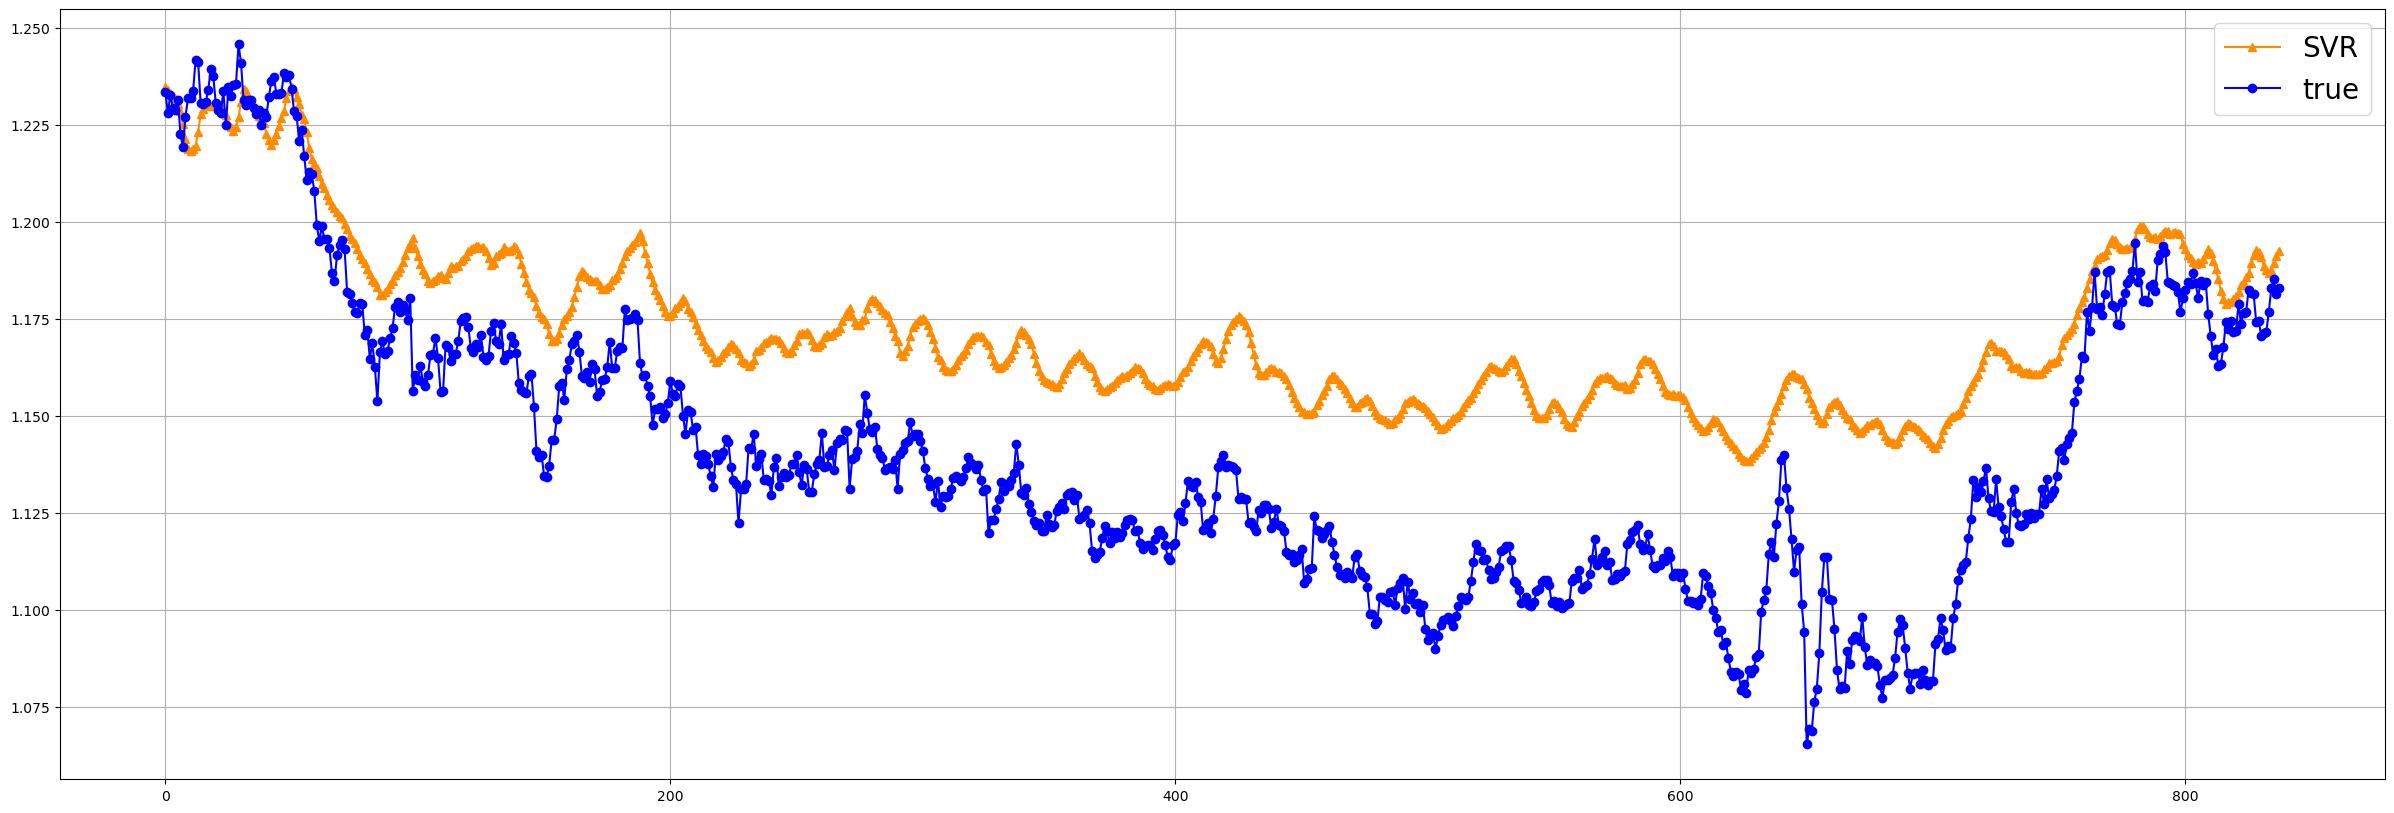

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,10))
plt.grid()
plt.plot(range(len(predictedPrices)),predictedPrices, color='darkorange', marker='^',label = 'SVR')
plt.plot(range(len(test_Y)),test_Y, color='blue', marker='o', label = 'true')
plt.legend(fontsize=20)
plt.show()

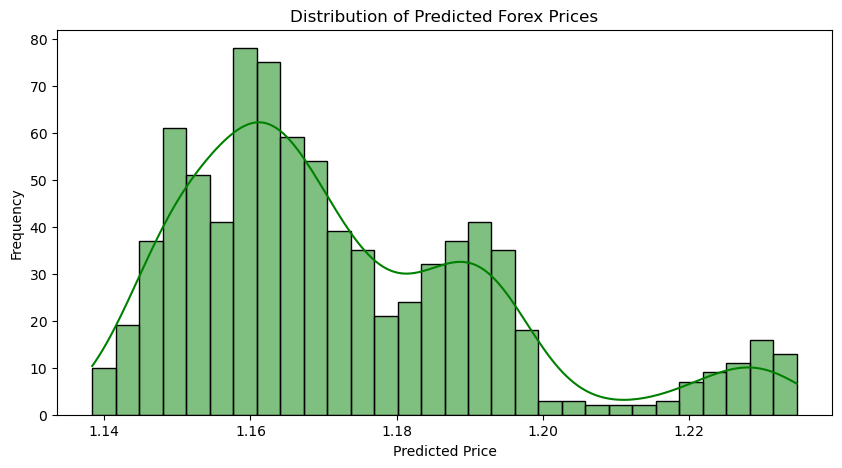

In [168]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(predictedPrices, bins=30, kde=True, color='green')
plt.xlabel("Predicted Price")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Forex Prices")
plt.show()

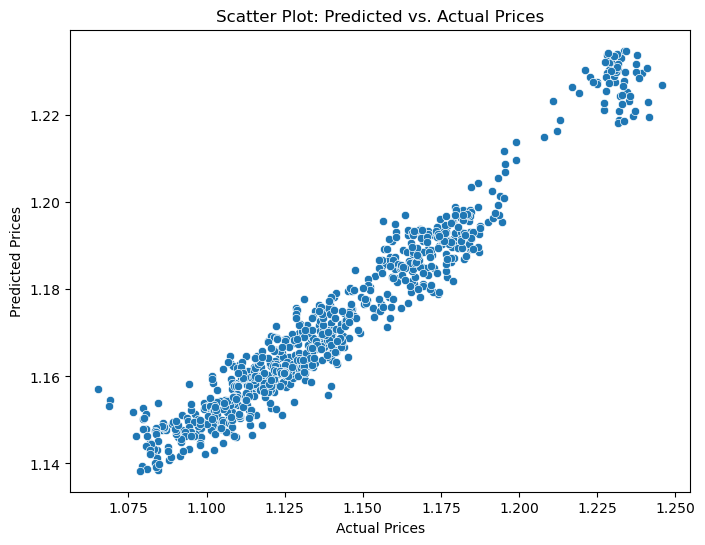

In [170]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=test_Y, y=predictedPrices)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Scatter Plot: Predicted vs. Actual Prices")
plt.show()

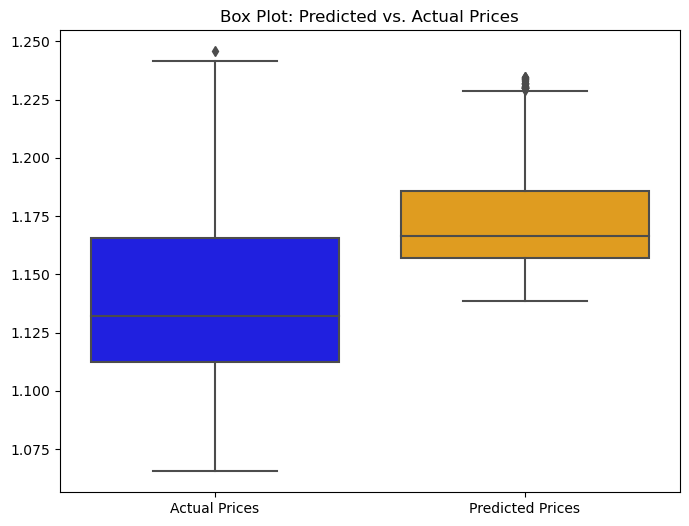

In [171]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[test_Y, predictedPrices], palette=["blue", "orange"])
plt.xticks([0, 1], ["Actual Prices", "Predicted Prices"])
plt.title("Box Plot: Predicted vs. Actual Prices")
plt.show()

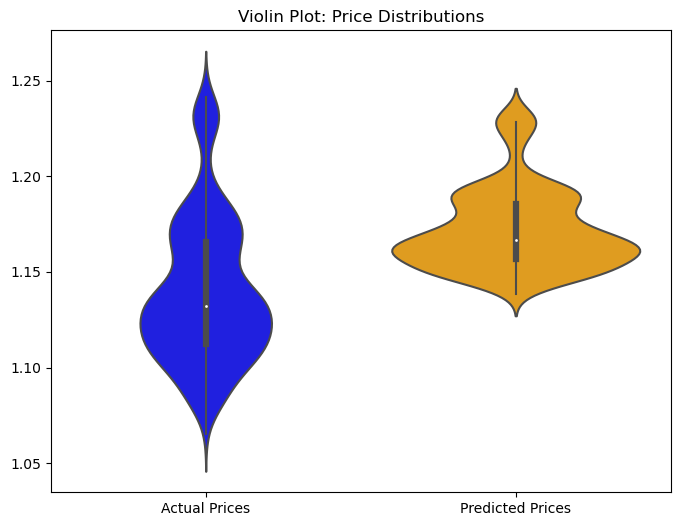

In [172]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=[test_Y, predictedPrices], palette=["blue", "orange"])
plt.xticks([0, 1], ["Actual Prices", "Predicted Prices"])
plt.title("Violin Plot: Price Distributions")
plt.show()

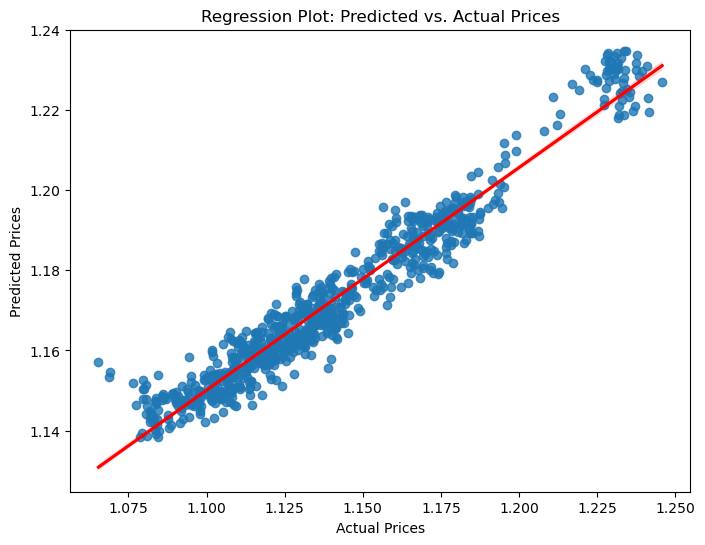

In [173]:
plt.figure(figsize=(8, 6))
sns.regplot(x=test_Y, y=predictedPrices, line_kws={"color": "red"})
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Regression Plot: Predicted vs. Actual Prices")
plt.show()

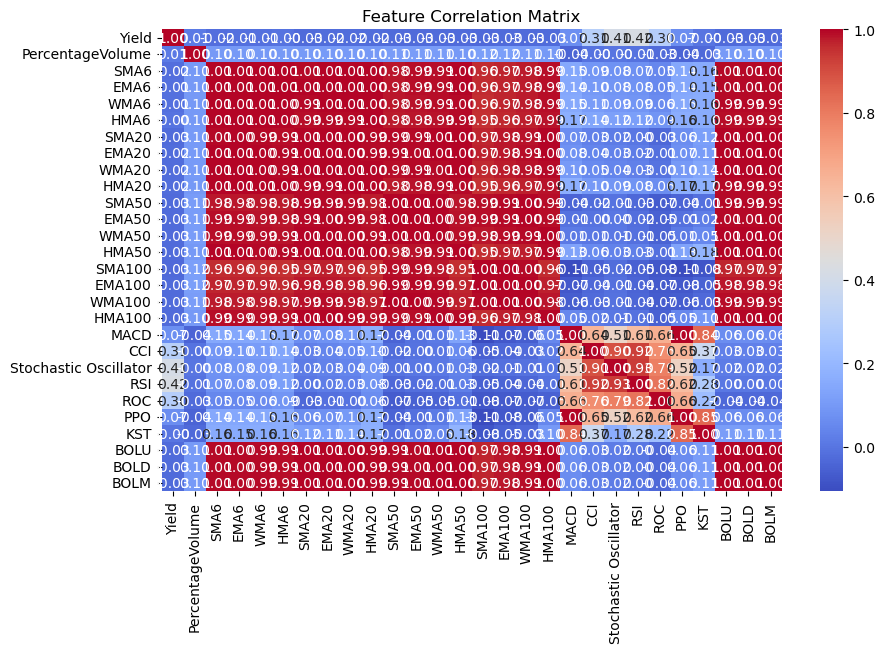

In [174]:
plt.figure(figsize=(10, 6))
sns.heatmap(normDf.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

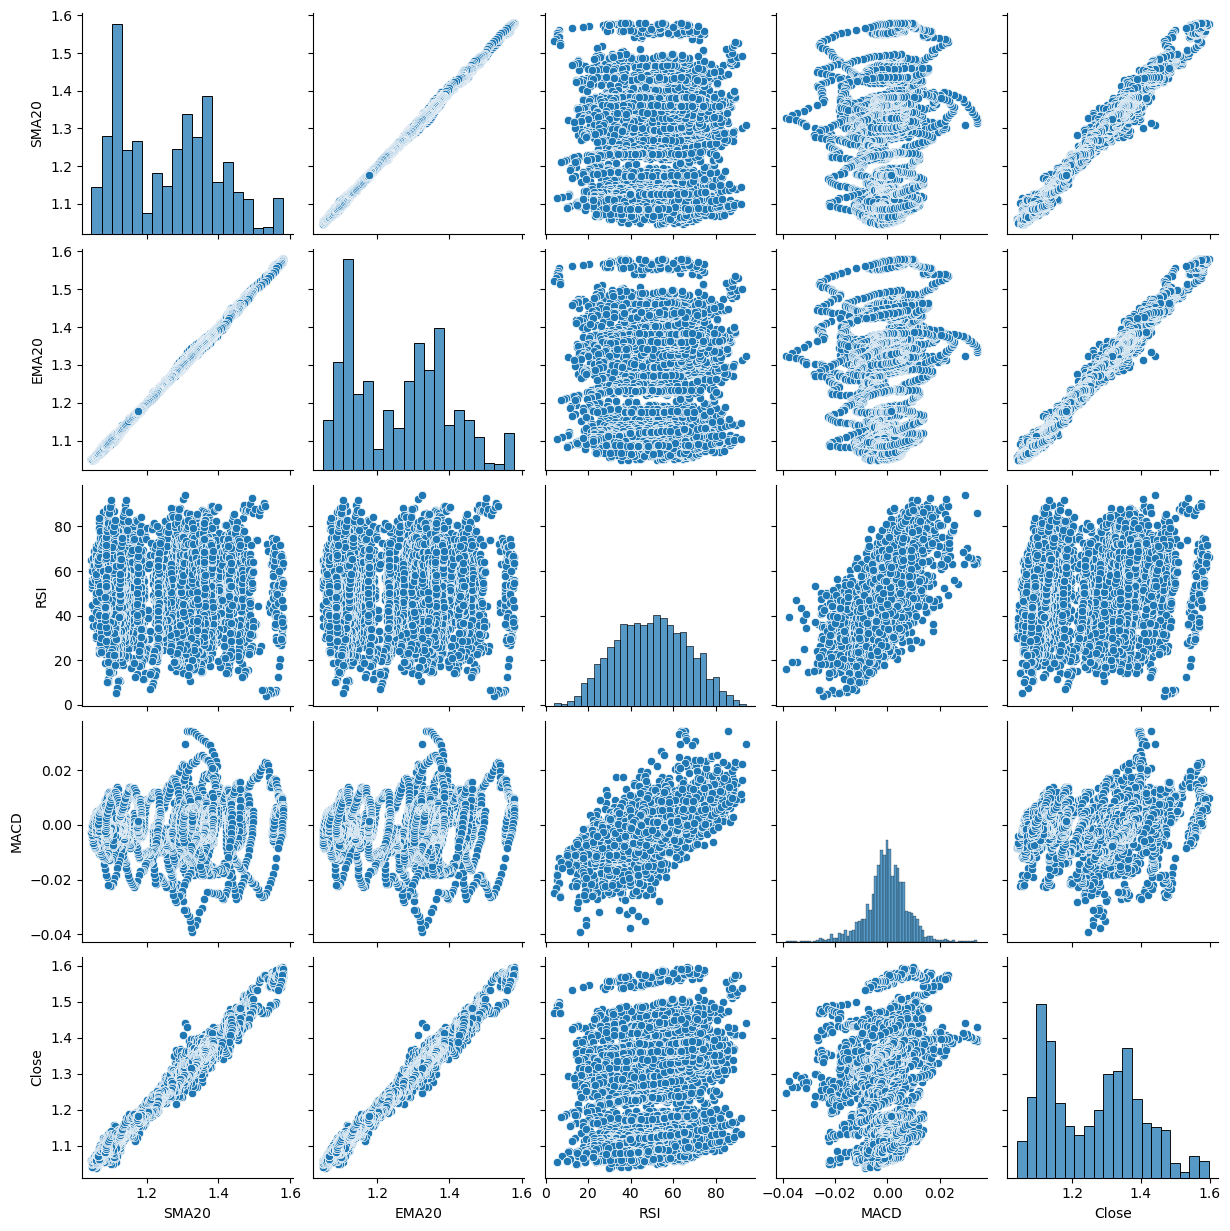

In [175]:
selected_features = ['SMA20', 'EMA20', 'RSI', 'MACD', 'Close']
sns.pairplot(data[selected_features])
plt.show()

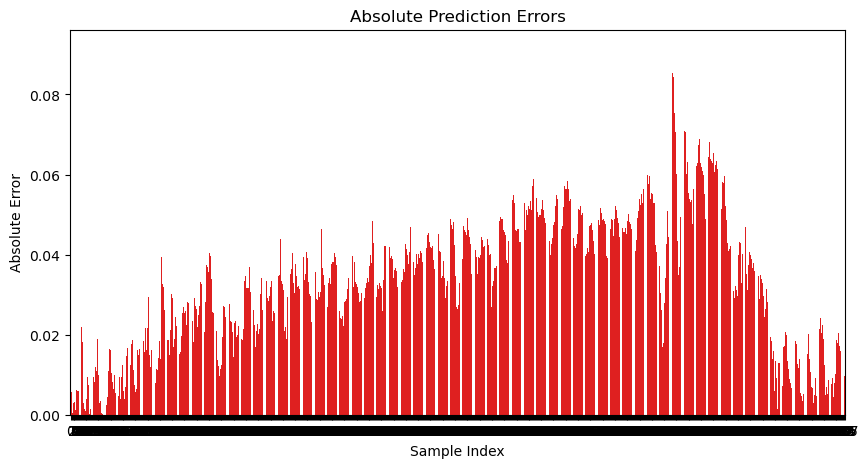

In [176]:
errors = np.abs(predictedPrices - test_Y)
plt.figure(figsize=(10, 5))
sns.barplot(x=np.arange(len(errors)), y=errors, color='red')
plt.xlabel("Sample Index")
plt.ylabel("Absolute Error")
plt.title("Absolute Prediction Errors")
plt.show()

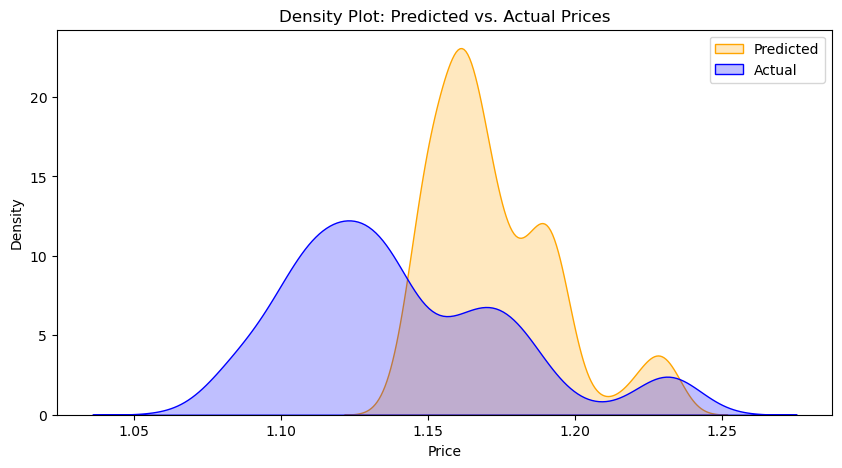

In [177]:
plt.figure(figsize=(10, 5))
sns.kdeplot(predictedPrices, label='Predicted', fill=True, color='orange')
sns.kdeplot(test_Y, label='Actual', fill=True, color='blue')
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Density Plot: Predicted vs. Actual Prices")
plt.legend()
plt.show()

Linear Regression and Polynomial Features

In [ ]:
from utilsation import *  
import pandas as pd

columns = ['Date','Open','High','Low','Close','Volume','Yield','PercentageVolume',
           'SMA6','EMA6','WMA6','HMA6','SMA20','EMA20','WMA20','HMA20','SMA50','EMA50','WMA50','HMA50',
           'SMA100','EMA100','WMA100','HMA100','MACD','CCI','Stochastic Oscillator','RSI','ROC','PPO',
           'KST','BOLU','BOLD','BOLM']
data = pd.read_csv('Data after preprocessing/EURUSD/EURUSD_D1.csv', names = columns, header = 0)
toAdd = ['Volume', 'Date','High','Low','Open','Close']
df = selectData(data,toAdd)

In [179]:
closingPrices = data['Close']
closingPrices = closingPrices.reset_index(drop=True)
normDf = normalizeData(df)
images = generateImages(normDf)
images = np.array(images)

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
train_X, _, train_Y, _ = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = True, random_state = 42)
_, test_X, _, test_Y = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = False)

In [ ]:
train_X = train_X.reshape(train_X.shape[0],28*28).astype(np.float32)
test_X = test_X.reshape(test_X.shape[0],28*28).astype(np.float32)

In [ ]:
from sklearn.linear_model import LinearRegression
from DTW import *
import json

with open("Machine Learning/MLModels.json","r") as f:
    params = json.load(f)["Linear Regression"]["EURUSD"]
lr = LinearRegression(**params)
predictedPrices = lr.fit(train_X, train_Y).predict(test_X)
print("MSE: {:e}".format(np.mean((predictedPrices-test_Y)**2)))
print("CORR: {:.3f}".format(np.corrcoef(predictedPrices, test_Y)[0,1]))
print("DTW: {:.3f}".format(DTW(predictedPrices, np.array(test_Y),1)))

MSE: 2.044720e-05
CORR: 0.993
DTW: 1.137


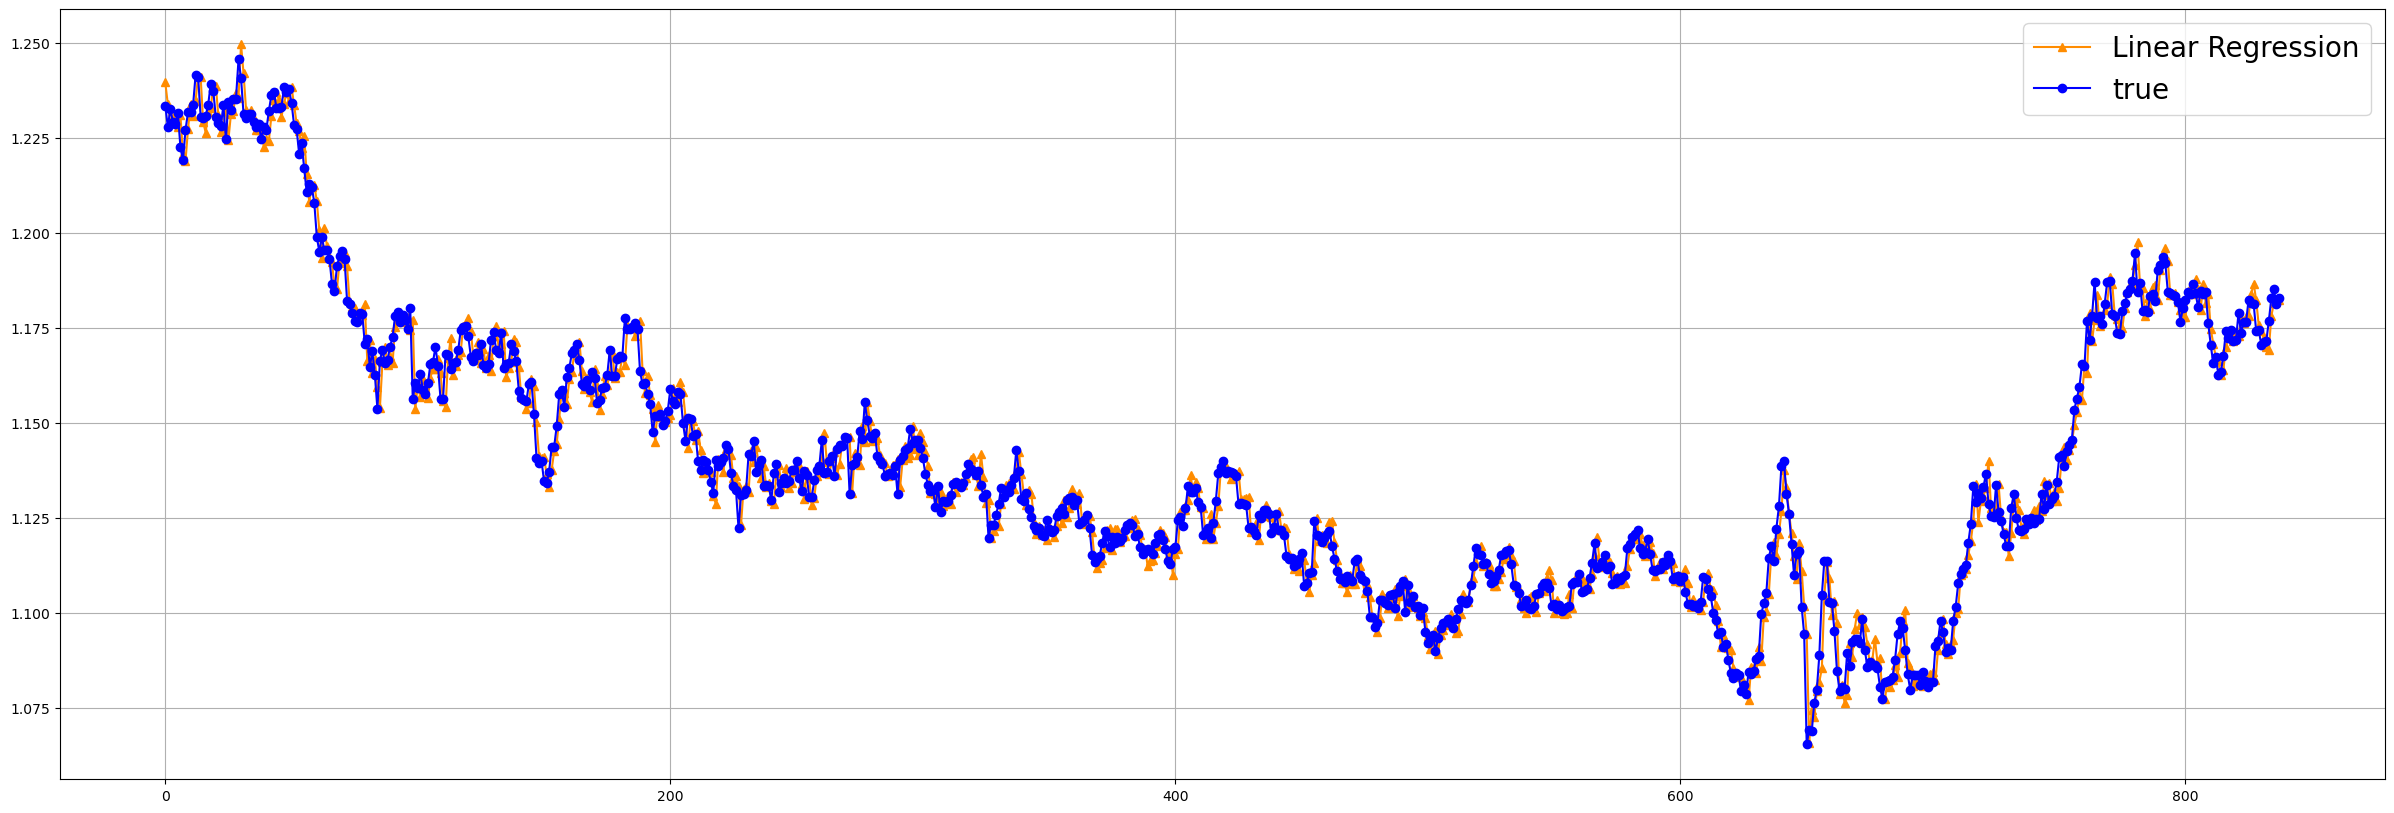

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,10))
plt.grid()
plt.plot(range(len(predictedPrices)),predictedPrices, color='darkorange', marker='^',label = 'Linear Regression')
plt.plot(range(len(test_Y)),test_Y, color='blue', marker='o', label = 'true')
plt.legend(fontsize=20)
plt.show()

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(predictedPrices, bins=30, kde=True, color='green')
plt.xlabel("Predicted Price")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Forex Prices")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=test_Y, y=predictedPrices)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Scatter Plot: Predicted vs. Actual Prices")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[test_Y, predictedPrices], palette=["blue", "orange"])
plt.xticks([0, 1], ["Actual Prices", "Predicted Prices"])
plt.title("Box Plot: Predicted vs. Actual Prices")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=[test_Y, predictedPrices], palette=["blue", "orange"])
plt.xticks([0, 1], ["Actual Prices", "Predicted Prices"])
plt.title("Violin Plot: Price Distributions")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=test_Y, y=predictedPrices, line_kws={"color": "red"})
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Regression Plot: Predicted vs. Actual Prices")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(normDf.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
selected_features = ['SMA20', 'EMA20', 'RSI', 'MACD', 'Close']
sns.pairplot(data[selected_features])
plt.show()

In [ ]:
errors = np.abs(predictedPrices - test_Y)
plt.figure(figsize=(10, 5))
sns.barplot(x=np.arange(len(errors)), y=errors, color='red')
plt.xlabel("Sample Index")
plt.ylabel("Absolute Error")
plt.title("Absolute Prediction Errors")
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(predictedPrices, label='Predicted', fill=True, color='orange')
sns.kdeplot(test_Y, label='Actual', fill=True, color='blue')
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Density Plot: Predicted vs. Actual Prices")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(predictedPrices)), y=predictedPrices, label='Predicted', color='orange')
sns.lineplot(x=range(len(test_Y)), y=test_Y, label='Actual', color='blue')
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("True vs. Predicted Forex Prices")
plt.legend()
plt.show()

Random Forest Regression

In [ ]:
from utilsation import *  
import pandas as pd

columns = ['Date','Open','High','Low','Close','Volume','Yield','PercentageVolume',
           'SMA6','EMA6','WMA6','HMA6','SMA20','EMA20','WMA20','HMA20','SMA50','EMA50','WMA50','HMA50',
           'SMA100','EMA100','WMA100','HMA100','MACD','CCI','Stochastic Oscillator','RSI','ROC','PPO',
           'KST','BOLU','BOLD','BOLM']
data = pd.read_csv('Data after preprocessing/EURUSD/EURUSD_D1.csv', names = columns, header = 0)
toAdd = ['Volume', 'Date','High','Low','Open','Close']
df = selectData(data,toAdd)

In [ ]:
closingPrices = data['Close']
closingPrices = closingPrices.reset_index(drop=True)
normDf = normalizeData(df)
images = generateImages(normDf)
images = np.array(images)

In [ ]:
from sklearn.model_selection import train_test_split
train_X, _, train_Y, _ = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = True, random_state = 42)
_, test_X, _, test_Y = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = False)

In [ ]:
train_X = train_X.reshape(train_X.shape[0],28*28).astype(np.float32)
test_X = test_X.reshape(test_X.shape[0],28*28).astype(np.float32)

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from DTW import *
import json

with open("Machine Learning/MLModels.json","r") as f:
    params = json.load(f)["Random Forest Regression"]["EURUSD"]
#rfg = RandomForestRegressor(**params)
rfg = RandomForestRegressor(n_estimators = 5000)
predictedPrices = rfg.fit(train_X, train_Y).predict(test_X)
print("MSE: {:e}".format(np.mean((predictedPrices-test_Y)**2)))
print("CORR: {:.3f}".format(np.corrcoef(predictedPrices, test_Y)[0,1]))
print("DTW: {:.3f}".format(DTW(predictedPrices, np.array(test_Y),1)))

'\nfrom sklearn.ensemble import RandomForestRegressor\nfrom Codes.DTW import *\nimport json\n\nwith open("ML/MLModels.json","r") as f:\n    params = json.load(f)["Random Forest Regression"]["EURUSD"]\n#rfg = RandomForestRegressor(**params)\nrfg = RandomForestRegressor(n_estimators = 5000)\npredictedPrices = rfg.fit(train_X, train_Y).predict(test_X)\nprint("MSE: {:e}".format(np.mean((predictedPrices-test_Y)**2)))\nprint("CORR: {:.3f}".format(np.corrcoef(predictedPrices, test_Y)[0,1]))\nprint("DTW: {:.3f}".format(DTW(predictedPrices, np.array(test_Y),1)))'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,10))
plt.grid()
plt.plot(range(len(predictedPrices)),predictedPrices, color='darkorange', marker='^',label = 'Random Forest Regression')
plt.plot(range(len(test_Y)),test_Y, color='blue', marker='o', label = 'true')
plt.legend(fontsize=20)
plt.show()

"import matplotlib.pyplot as plt\n%matplotlib inline\nplt.figure(figsize=(30,10))\nplt.grid()\nplt.plot(range(len(predictedPrices)),predictedPrices, color='darkorange', marker='^',label = 'Random Forest Regression')\nplt.plot(range(len(test_Y)),test_Y, color='blue', marker='o', label = 'true')\nplt.legend(fontsize=20)\nplt.show()"

In [ ]:
features_importances = rfg.feature_importances_
impurityFeatures = [(name,sum(features_importances[i::28])) for name,i in zip(df.columns,range(28))]
impurityFeatures.sort(key = lambda x: x[1], reverse = True)
print("Explained variance by the features:\n")
print("\n".join([elem[0]+" "+str(elem[1]) for elem in impurityFeatures]))

'features_importances = rfg.feature_importances_\nimpurityFeatures = [(name,sum(features_importances[i::28])) for name,i in zip(df.columns,range(28))]\nimpurityFeatures.sort(key = lambda x: x[1], reverse = True)\nprint("Explained variance by the features:\n")\nprint("\n".join([elem[0]+" "+str(elem[1]) for elem in impurityFeatures]))'

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(predictedPrices, bins=30, kde=True, color='green')
plt.xlabel("Predicted Price")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Forex Prices")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=test_Y, y=predictedPrices)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Scatter Plot: Predicted vs. Actual Prices")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[test_Y, predictedPrices], palette=["blue", "orange"])
plt.xticks([0, 1], ["Actual Prices", "Predicted Prices"])
plt.title("Box Plot: Predicted vs. Actual Prices")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=[test_Y, predictedPrices], palette=["blue", "orange"])
plt.xticks([0, 1], ["Actual Prices", "Predicted Prices"])
plt.title("Violin Plot: Price Distributions")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=test_Y, y=predictedPrices, line_kws={"color": "red"})
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Regression Plot: Predicted vs. Actual Prices")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(normDf.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
selected_features = ['SMA20', 'EMA20', 'RSI', 'MACD', 'Close']
sns.pairplot(data[selected_features])
plt.show()

In [ ]:
errors = np.abs(predictedPrices - test_Y)
plt.figure(figsize=(10, 5))
sns.barplot(x=np.arange(len(errors)), y=errors, color='red')
plt.xlabel("Sample Index")
plt.ylabel("Absolute Error")
plt.title("Absolute Prediction Errors")
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(predictedPrices, label='Predicted', fill=True, color='orange')
sns.kdeplot(test_Y, label='Actual', fill=True, color='blue')
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Density Plot: Predicted vs. Actual Prices")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(predictedPrices)), y=predictedPrices, label='Predicted', color='orange')
sns.lineplot(x=range(len(test_Y)), y=test_Y, label='Actual', color='blue')
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("True vs. Predicted Forex Prices")
plt.legend()
plt.show()

Bayesian Ridge Regression

In [ ]:
from utilsation import *  
import pandas as pd

columns = ['Date','Open','High','Low','Close','Volume','Yield','PercentageVolume',
           'SMA6','EMA6','WMA6','HMA6','SMA20','EMA20','WMA20','HMA20','SMA50','EMA50','WMA50','HMA50',
           'SMA100','EMA100','WMA100','HMA100','MACD','CCI','Stochastic Oscillator','RSI','ROC','PPO',
           'KST','BOLU','BOLD','BOLM']
data = pd.read_csv('Data after preprocessing/EURUSD/EURUSD_D1.csv', names = columns, header = 0)
toAdd = ['Volume', 'Date','High','Low','Open','Close']
df = selectData(data,toAdd)

"from Codes.utils import *  \nimport pandas as pd\n\ncolumns = ['Date','Open','High','Low','Close','Volume','Yield','PercentageVolume',\n           'SMA6','EMA6','WMA6','HMA6','SMA20','EMA20','WMA20','HMA20','SMA50','EMA50','WMA50','HMA50',\n           'SMA100','EMA100','WMA100','HMA100','MACD','CCI','Stochastic Oscillator','RSI','ROC','PPO',\n           'KST','BOLU','BOLD','BOLM']\ndata = pd.read_csv('Data pre-processed/EURUSD/EURUSD_D1.csv', names = columns, header = 0)\ntoRemove = ['Volume', 'Date','High','Low','Open','Close']\ndf = selectData(data,toRemove)"

In [ ]:
closingPrices = data['Close']
closingPrices = closingPrices.reset_index(drop=True)
normDf = normalizeData(df)
images = generateImages(normDf)
images = np.array(images)

"closingPrices = data['Close']\nclosingPrices = closingPrices.reset_index(drop=True)\nnormDf = normalizeData(df)\nimages = generateImages(normDf)\nimages = np.array(images)"

In [ ]:
from sklearn.model_selection import train_test_split
train_X, _, train_Y, _ = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = True, random_state = 42)
_, test_X, _, test_Y = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = False)

'from sklearn.model_selection import train_test_split\ntrain_X, _, train_Y, _ = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = True, random_state = 42)\n_, test_X, _, test_Y = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = False)'

In [ ]:
train_X = train_X.reshape(train_X.shape[0],28*28).astype(np.float32)
test_X = test_X.reshape(test_X.shape[0],28*28).astype(np.float32)

'train_X = train_X.reshape(train_X.shape[0],28*28).astype(np.float32)\ntest_X = test_X.reshape(test_X.shape[0],28*28).astype(np.float32)'

In [ ]:
from sklearn.linear_model import BayesianRidge
from DTW import *
import json

with open("Machine Learning/MLModels.json","r") as f:
    params = json.load(f)["Bayesian Ridge Regression"]["EURUSD"]
brr = BayesianRidge(**params)
predictedPrices = brr.fit(train_X, train_Y).predict(test_X)
print("MSE: {:e}".format(np.mean((predictedPrices-test_Y)**2)))
print("CORR: {:.3f}".format(np.corrcoef(predictedPrices, test_Y)[0,1]))
print("DTW: {:.3f}".format(DTW(predictedPrices, np.array(test_Y),1)))

'from sklearn.linear_model import BayesianRidge\nfrom Codes.DTW import *\nimport json\n\nwith open("ML/MLModels.json","r") as f:\n    params = json.load(f)["Bayesian Ridge Regression"]["EURUSD"]\nbrr = BayesianRidge(**params)\npredictedPrices = brr.fit(train_X, train_Y).predict(test_X)\nprint("MSE: {:e}".format(np.mean((predictedPrices-test_Y)**2)))\nprint("CORR: {:.3f}".format(np.corrcoef(predictedPrices, test_Y)[0,1]))\nprint("DTW: {:.3f}".format(DTW(predictedPrices, np.array(test_Y),1)))'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,10))
plt.grid()
plt.plot(range(len(predictedPrices)),predictedPrices, color='darkorange', marker='^',label = 'Bayesian Ridge Regression')
plt.plot(range(len(test_Y)),test_Y, color='blue', marker='o', label = 'true')
plt.legend(fontsize=20)
plt.show()

"import matplotlib.pyplot as plt\n%matplotlib inline\nplt.figure(figsize=(30,10))\nplt.grid()\nplt.plot(range(len(predictedPrices)),predictedPrices, color='darkorange', marker='^',label = 'Bayesian Ridge Regression')\nplt.plot(range(len(test_Y)),test_Y, color='blue', marker='o', label = 'true')\nplt.legend(fontsize=20)\nplt.show()"

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(predictedPrices, bins=30, kde=True, color='green')
plt.xlabel("Predicted Price")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Forex Prices")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=test_Y, y=predictedPrices)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Scatter Plot: Predicted vs. Actual Prices")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[test_Y, predictedPrices], palette=["blue", "orange"])
plt.xticks([0, 1], ["Actual Prices", "Predicted Prices"])
plt.title("Box Plot: Predicted vs. Actual Prices")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=[test_Y, predictedPrices], palette=["blue", "orange"])
plt.xticks([0, 1], ["Actual Prices", "Predicted Prices"])
plt.title("Violin Plot: Price Distributions")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=test_Y, y=predictedPrices, line_kws={"color": "red"})
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Regression Plot: Predicted vs. Actual Prices")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(normDf.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
selected_features = ['SMA20', 'EMA20', 'RSI', 'MACD', 'Close']
sns.pairplot(data[selected_features])
plt.show()

In [ ]:
errors = np.abs(predictedPrices - test_Y)
plt.figure(figsize=(10, 5))
sns.barplot(x=np.arange(len(errors)), y=errors, color='red')
plt.xlabel("Sample Index")
plt.ylabel("Absolute Error")
plt.title("Absolute Prediction Errors")
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(predictedPrices, label='Predicted', fill=True, color='orange')
sns.kdeplot(test_Y, label='Actual', fill=True, color='blue')
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Density Plot: Predicted vs. Actual Prices")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(predictedPrices)), y=predictedPrices, label='Predicted', color='orange')
sns.lineplot(x=range(len(test_Y)), y=test_Y, label='Actual', color='blue')
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("True vs. Predicted Forex Prices")
plt.legend()
plt.show()

K-Nearest Neighbours Regression

In [ ]:
from utilsation import *  
import pandas as pd


columns = ['Date','Open','High','Low','Close','Volume','Yield','PercentageVolume',
           'SMA6','EMA6','WMA6','HMA6','SMA20','EMA20','WMA20','HMA20','SMA50','EMA50','WMA50','HMA50',
           'SMA100','EMA100','WMA100','HMA100','MACD','CCI','Stochastic Oscillator','RSI','ROC','PPO',
           'KST','BOLU','BOLD','BOLM']
data = pd.read_csv('Data after preprocessing/EURUSD/EURUSD_D1.csv', names = columns, header = 0)
toAdd = ['Volume', 'Date','High','Low','Open','Close']
df = selectData(data,toAdd)

In [ ]:
closingPrices = data['Close']
closingPrices = closingPrices.reset_index(drop=True)
normDf = normalizeData(df)
images = generateImages(normDf)
images = np.array(images)

In [ ]:
from sklearn.model_selection import train_test_split
train_X, _, train_Y, _ = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = True, random_state = 42)
_, test_X, _, test_Y = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = False)

In [1]:
train_X = train_X.reshape(train_X.shape[0],28*28).astype(np.float32)
test_X = test_X.reshape(test_X.shape[0],28*28).astype(np.float32)

NameError: name 'train_X' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from DTW import *
import json

with open("Machine Learning/MLModels.json","r") as f:
    params = json.load(f)["KNN Regression"]["EURUSD"]
knn = KNeighborsRegressor(**params)
predictedPrices = knn.fit(train_X, train_Y).predict(test_X)
print("MSE: {:e}".format(np.mean((predictedPrices-test_Y)**2)))
print("CORR: {:.3f}".format(np.corrcoef(predictedPrices, test_Y)[0,1]))
print("DTW: {:.3f}".format(DTW(predictedPrices, np.array(test_Y),1)))

MSE: 1.587217e-05
CORR: 0.995
DTW: 0.921


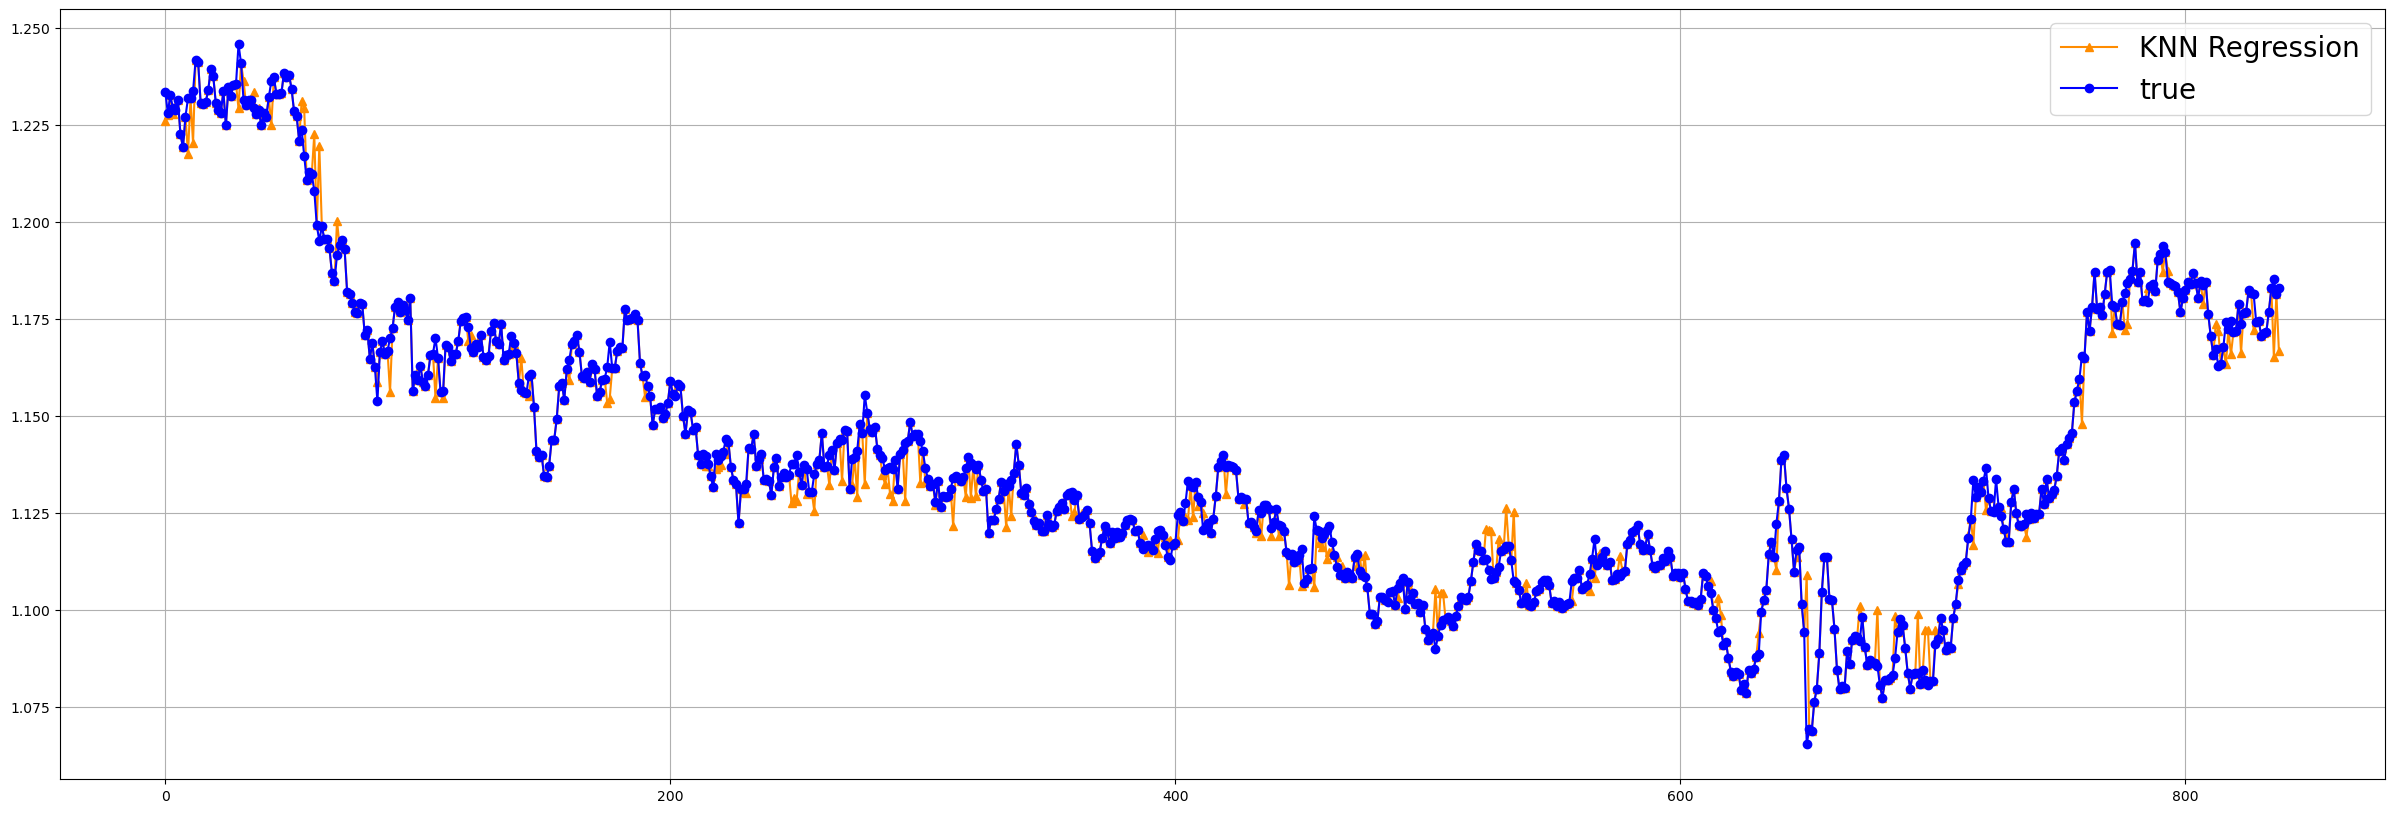

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,10))
plt.grid()
plt.plot(range(len(predictedPrices)),predictedPrices, color='darkorange', marker='^',label = 'KNN Regression')
plt.plot(range(len(test_Y)),test_Y, color='blue', marker='o', label = 'true')
plt.legend(fontsize=20)
plt.show()

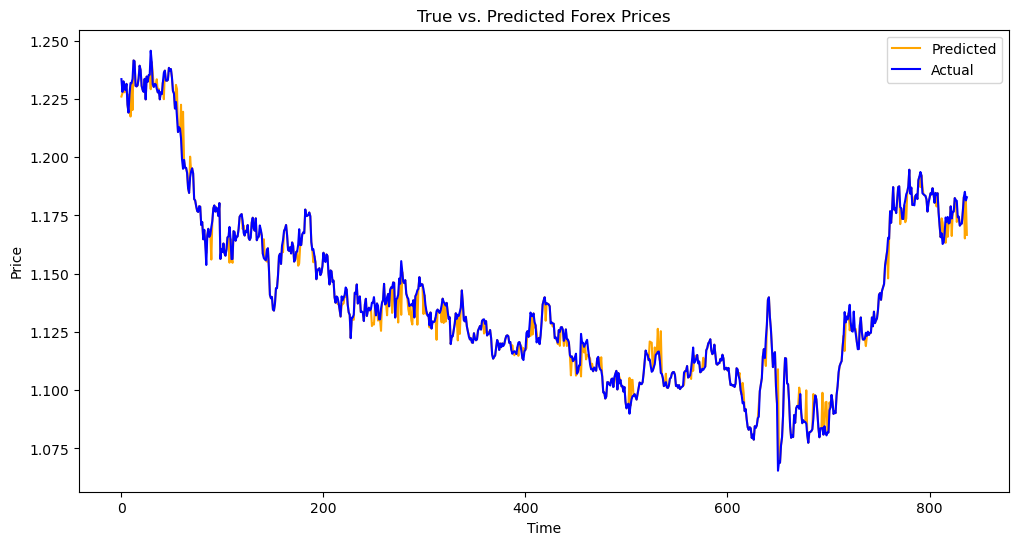

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(predictedPrices)), y=predictedPrices, label='Predicted', color='orange')
sns.lineplot(x=range(len(test_Y)), y=test_Y, label='Actual', color='blue')
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("True vs. Predicted Forex Prices")
plt.legend()
plt.show()

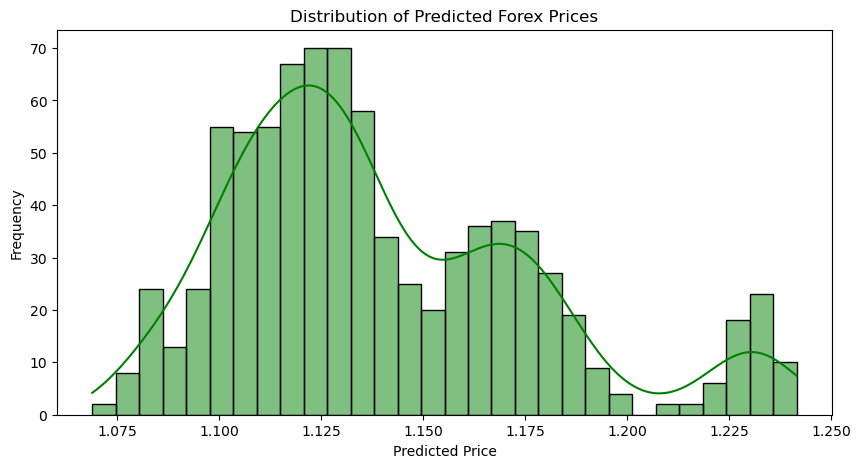

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(predictedPrices, bins=30, kde=True, color='green')
plt.xlabel("Predicted Price")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Forex Prices")
plt.show()

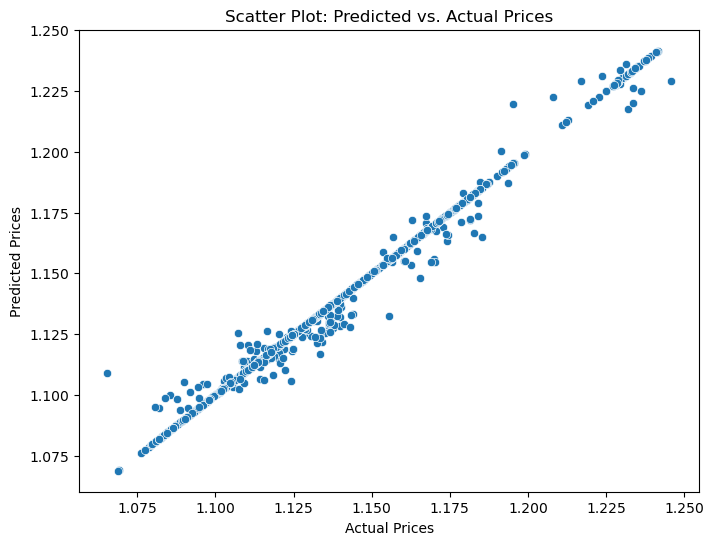

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=test_Y, y=predictedPrices)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Scatter Plot: Predicted vs. Actual Prices")
plt.show()

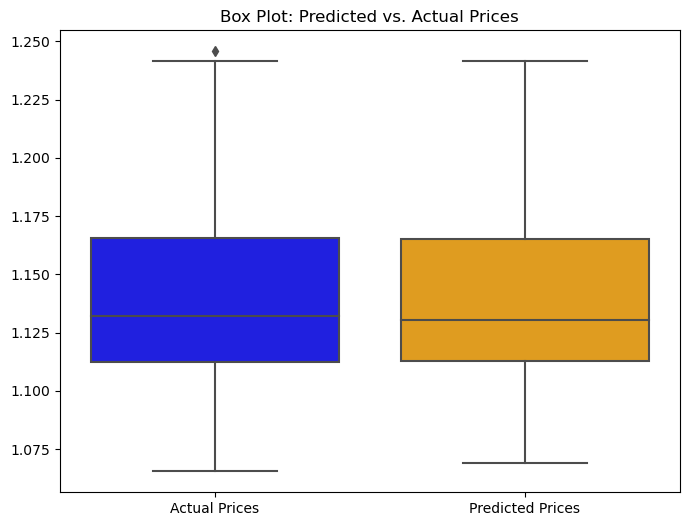

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[test_Y, predictedPrices], palette=["blue", "orange"])
plt.xticks([0, 1], ["Actual Prices", "Predicted Prices"])
plt.title("Box Plot: Predicted vs. Actual Prices")
plt.show()

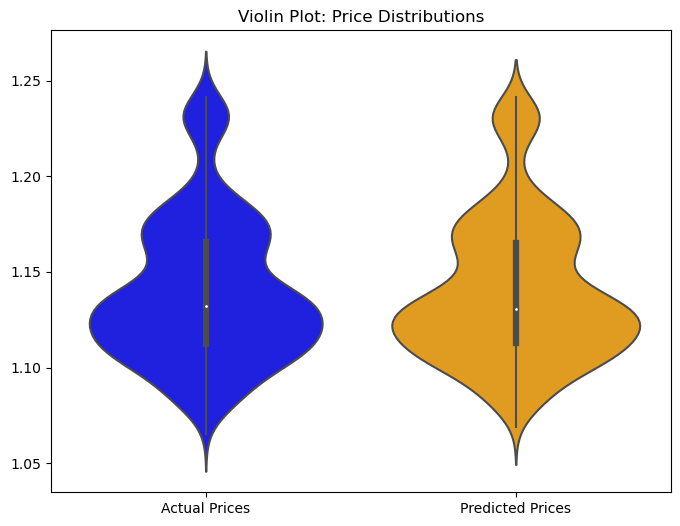

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=[test_Y, predictedPrices], palette=["blue", "orange"])
plt.xticks([0, 1], ["Actual Prices", "Predicted Prices"])
plt.title("Violin Plot: Price Distributions")
plt.show()

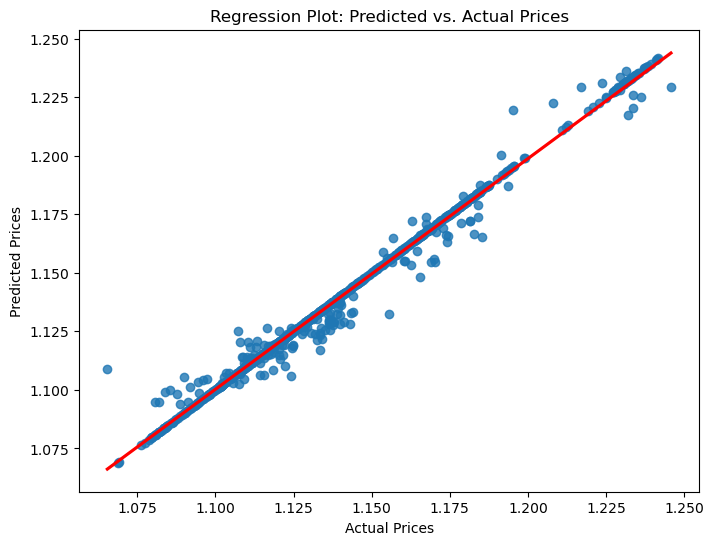

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=test_Y, y=predictedPrices, line_kws={"color": "red"})
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Regression Plot: Predicted vs. Actual Prices")
plt.show()

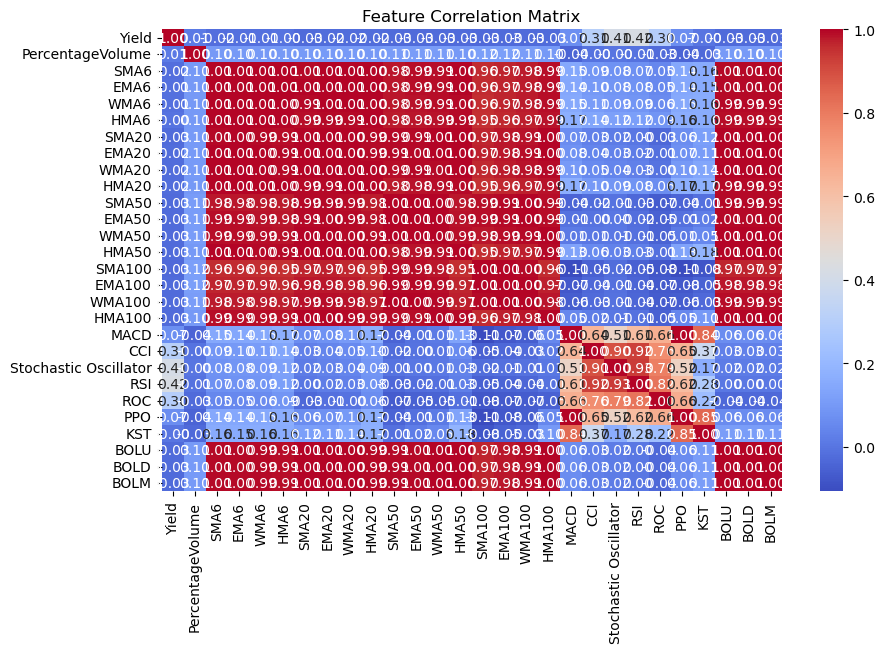

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(normDf.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
errors = np.abs(predictedPrices - test_Y)
plt.figure(figsize=(10, 5))
sns.barplot(x=np.arange(len(errors)), y=errors, color='red')
plt.xlabel("Sample Index")
plt.ylabel("Absolute Error")
plt.title("Absolute Prediction Errors")
plt.show()

AttributeError: 'bool' object has no attribute 'all'

<Figure size 1000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(predictedPrices, label='Predicted', fill=True, color='orange')
sns.kdeplot(test_Y, label='Actual', fill=True, color='blue')
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Density Plot: Predicted vs. Actual Prices")
plt.legend()
plt.show()